## K-nearest Neighbors 

### Welcome!

If you are not familiar with the KNN algorithm, here's a cool explanation from GPT 4:

**Concept of Nearest Neighbors:** Imagine you're in a room with a bunch of people. Some are your friends, and some are strangers. If I ask you to find the three people most similar to you, you might look for those who share your interests, age, or background. This is similar to what KNN does but with data points instead of people.

**
The 'K' in KN**N: The 'K' stands for the number of neighbors the algorithm considers. If K=3, the algorithm looks for the three closest neighbors. If K=5, it looks for five, and so on. The value of K can greatly affect the results of the algorithm.**

How KNN Wo**rks: KNN is used for classification and regression tasks. In classification, it categorizes objects based on the categories of their nearest neighbors. In regression, it predicts a value based on the values of its nearest neighbors.

In this case, we are working with a **classification** problem using KNN algorithm! :)

**Classification Example:** Let's say we have a bunch of fruits categorized as either 'Apple' or 'Orange', and we have a new fruit we need to categorize. We plot all fruits in a graph based on features like sweetness and color. To categorize the new fruit, KNN looks at the categories of the nearest K fruits. If most of them are 'Apple', the new fruit is also classified as an 'Apple'.

## Imports

These are the libraries we are going to use in this experiment.

We highly recommend you to use the Data Science image :)

In [1]:
!pip install seaborn
!pip install altair

In [27]:
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import mlflow
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime

2024-07-04 09:28:49.362627: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 09:28:50.609175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
np.random.seed(2401)

## Dataset: Classified Company Data [Interview style Data]

This dataset was taken from Kaggle and has 10 columns that work as features and one target column. The data in these columns are completely random.
Source: https://www.kaggle.com/datasets/aayushmishra1512/classifieddata

In [5]:
df = pd.read_csv("Classified_Data.csv",index_col=0)
display(df.head())
display(df.shape)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


(1000, 11)

## Exploratory Data Analysis

Let's get to know more about our data and its behavior.

In [6]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


The features have different means (averages) and standard deviations. For instance, the mean of 'WTT' is approximately 0.95, while the mean of 'PTI' is around 1.11, and the mean of 'HQE' is about 1.16.

This variability can affect algorithms that are scale-sensitive, potentially giving undue importance to features with larger variance.

In [7]:
sns.set_style("dark")

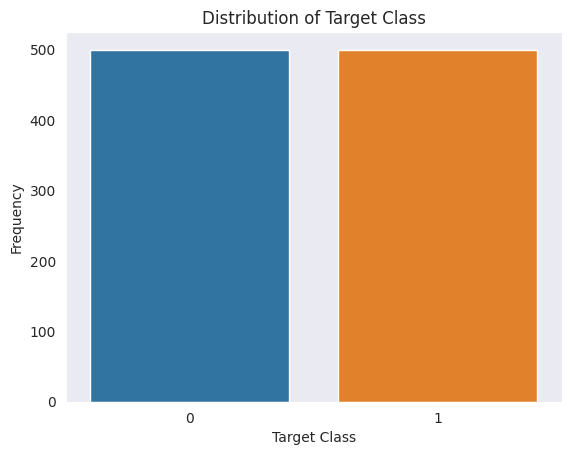

In [8]:
# Countplot to visualize the distribution of the target class
countplot = sns.countplot(x='TARGET CLASS', data=df)
countplot.set_title('Distribution of Target Class')
countplot.set_xlabel('Target Class')
countplot.set_ylabel('Frequency');

TOTALLY balanced! That's good for the model :) 

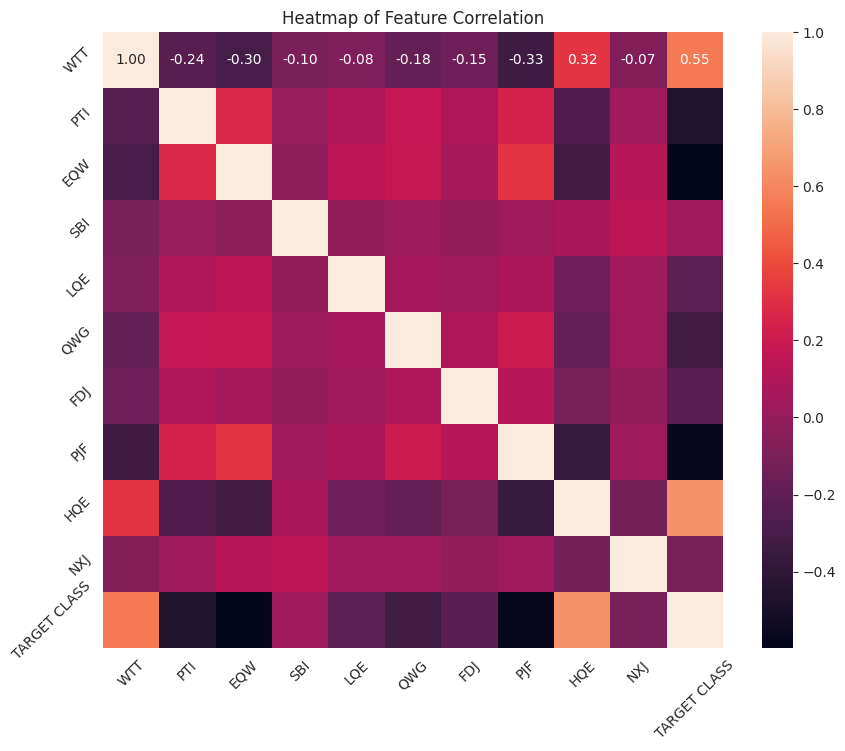

In [9]:
# Heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
correlation_heatmap = sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Heatmap of Feature Correlation')
plt.xticks(rotation=45)
plt.yticks(rotation=45);  # Rotating ticks for better readability

PTI, EQW and PFJ are considerably negatively correlated with the target class.
Let's compare them with the target class using a scatter plot.

Let's see some interactive plots with ALtair:

In [10]:
scatter_chart = alt.Chart(df).mark_point().encode(
    x='PTI',
    y='EQW',
    color='TARGET CLASS:N',  # ':N' denotes a nominal (categorical) data type
    tooltip=['WTT', 'PTI', 'TARGET CLASS']
).interactive()  # This makes the chart interactive

# Display the chart
scatter_chart

alt.Chart(...)

In [12]:
scatter_chart = alt.Chart(df).mark_point().encode(
    x='PTI',
    y='PJF',
    color='TARGET CLASS:N',  # ':N' denotes a nominal (categorical) data type
    tooltip=['PJF', 'PTI', 'TARGET CLASS']
).interactive()  # This makes the chart interactive

# Display the chart
scatter_chart

alt.Chart(...)

We can also use seaborn for subplots!

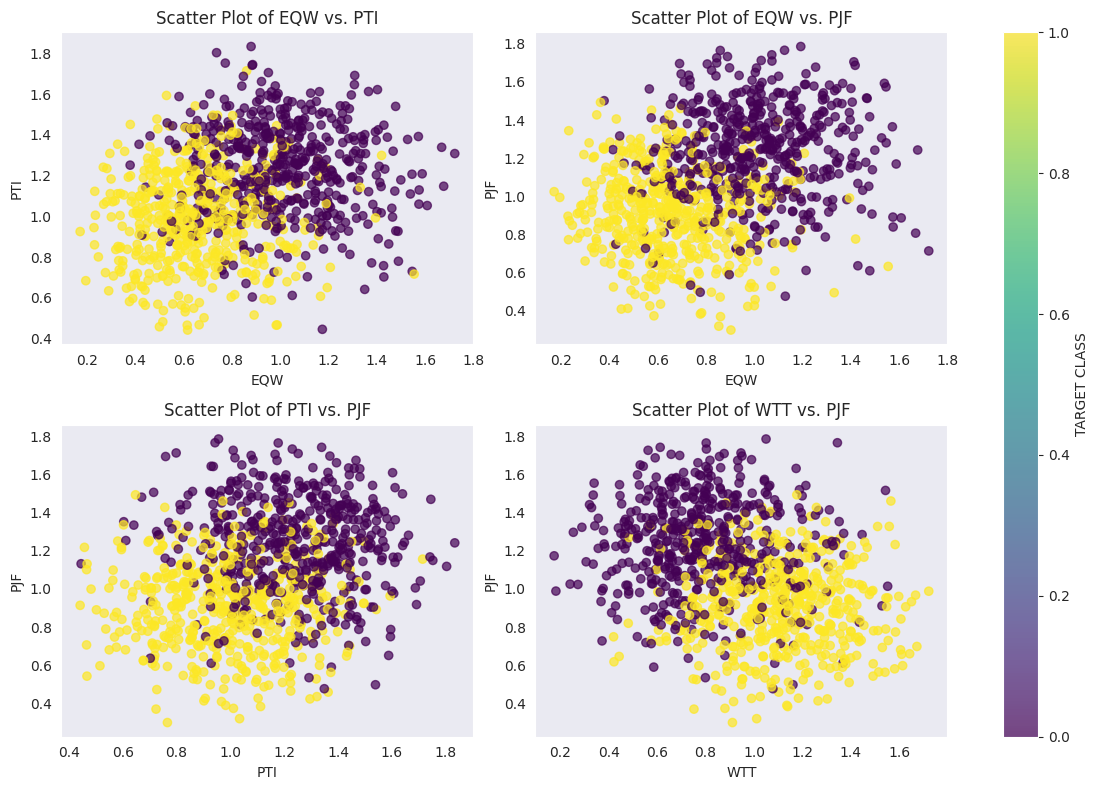

In [13]:
feature_pairs = [('EQW', 'PTI'), ('EQW', 'PJF'), ('PTI', 'PJF'), ('WTT', 'PJF')]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, (feature_x, feature_y) in enumerate(feature_pairs):
    # Create scatter plot in the ith subplot
    sc = axes[i].scatter(df[feature_x], df[feature_y], alpha=0.7, c=df['TARGET CLASS'], cmap='viridis')
    axes[i].set_title(f'Scatter Plot of {feature_x} vs. {feature_y}')
    axes[i].set_xlabel(feature_x)
    axes[i].set_ylabel(feature_y)

# Adjust layout to prevent overlap
fig.tight_layout()

# Add a colorbar for the scatter plots
cbar = fig.colorbar(sc, ax=axes, orientation='vertical')
cbar.set_label('TARGET CLASS')

plt.show()

In the 'EQW vs. PTI' plot, there doesn't appear to be a clear linear relationship between these two features, as the data points are somewhat evenly distributed across the plot area.

The 'EQW vs. PJF' plot also does not show a clear pattern or relationship between the variables.

The 'PTI vs. PJF' plot shows a similar distribution with no obvious linear relationship.

The 'WTT vs. PJF' scatter plot is again quite scattered, suggesting a complex or non-linear relationship, if any.

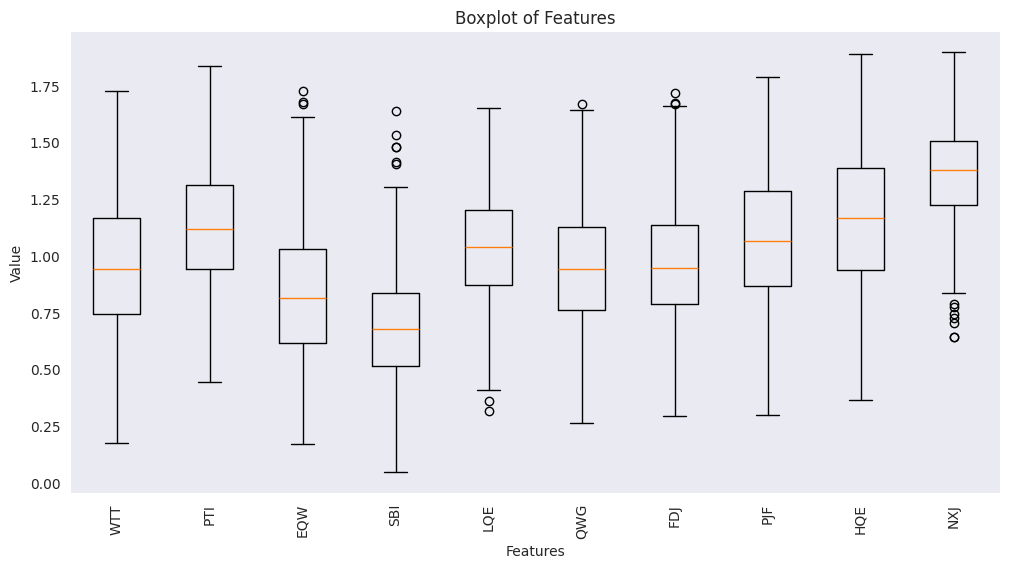

In [14]:
plt.figure(figsize=(12, 6))
plt.boxplot(df.drop('TARGET CLASS', axis=1).values, labels=df.drop('TARGET CLASS', axis=1).columns)
plt.title('Boxplot of Features')  
plt.xlabel('Features')            
plt.ylabel('Value')               
plt.xticks(rotation=90)           
plt.show()

Several features exhibit outliers, which are the individual points beyond the whiskers. Features 'EQW', 'SBI', 'LQE', 'QWG', and 'NXJ' have outliers above the upper whisker, and 'SBI' has outliers below the lower whisker. This suggests that there are data points that deviate significantly from the rest of the dataset for these features.

## Standardize the Variables

Standardization (also known as Z-score normalization) scales the data so that the features will have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. 

This is particularly useful when your features have different units or different ranges because standardization gives all features the same influence on the distance calculations that many algorithms make.

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [17]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [18]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [19]:
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.575717e-17,2.833289e-16,-3.996803e-17,-9.237056e-17,-9.343637e-16,1.101341e-16,1.669775e-16,-3.375078e-16,3.552714e-17,-3.641532e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


This is our new dataframe, now standardized.

### Data explored and standardized, it's time to get down to business! 😎
## Training

### Train and test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [21]:
print(f'Total for training: {len(X_train)}')
print(f'Total for testing: {len(X_test)}')

Total for training: 700
Total for testing: 300


### Instantiating the KNN

One of the parameters that needs to be passed to the KNN is the number of neighbors we would like to use for the classification.

One way to do this is to Observe the training error and the validation/test error in relation to different values of k. The best value of k is the one that minimizes the generalization error, that is, the difference between the training error and the validation/test error.

#### Choosing a K Value

To achieve this, we will use MLFlow and log the error we obtained with different values for k. This will help us choose the best value :)

Let's try with 20 k values.

In [22]:
mlflow.set_experiment('KNN_Optimization-3')

for k in range(1, 21):
    with mlflow.start_run(run_name=f'{k}'):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        pred_i = knn.predict(X_test)

        error = np.mean(pred_i != y_test)
        f1 = f1_score(y_test, pred_i, average='binary')

        mlflow.log_param('k', k)
        mlflow.log_metric('error_rate', error)
        mlflow.log_metric('f1_score', f1)
        
        mlflow.end_run()

2024/07/04 08:57:55 INFO mlflow.tracking.fluent: Experiment with name 'KNN_Optimization-3' does not exist. Creating a new experiment.


Go to Monitor tab to check the results!

Try seeing the charts! Compare the runs!

We can see that using k=14 we have the minimum error, which is 0.04

# KNN with K = 14

In [23]:
k = 14

In [24]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Metrics

In [25]:
# Calculate metrics
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       144
           1       0.96      0.96      0.96       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Great precision!

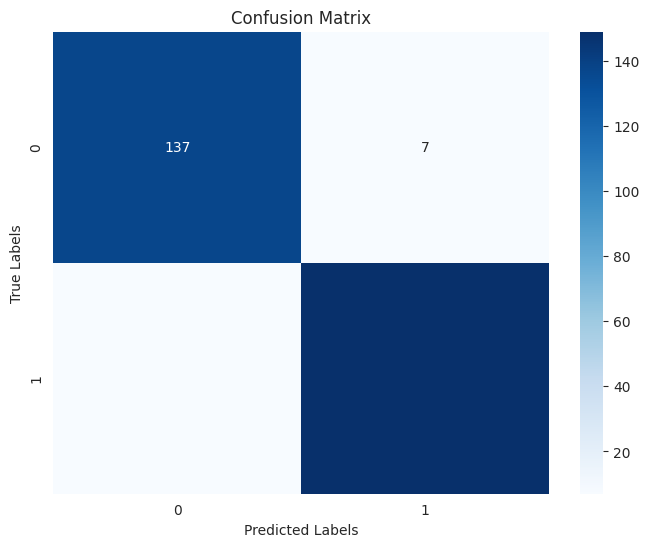

In [26]:

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Low errors! Thats what we like!

In [29]:
log_dir = "/phoenix/tensorboard/tensorlogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

mlflow.set_experiment('KNN_Optimization-3')

for k in range(1, 21):
    with mlflow.start_run(run_name=f'{k}'):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        pred_i = knn.predict(X_test)

        error = np.mean(pred_i != y_test)
        f1 = f1_score(y_test, pred_i, average='binary')

        mlflow.log_param('k', k)
        mlflow.log_metric('error_rate', error)
        mlflow.log_metric('f1_score', f1)
        
        with tf.summary.create_file_writer(log_dir).as_default():
            tf.summary.scalar("Error Rate", error, step=k)
            tf.summary.scalar("F1 Score", f1, step=k)
            tf.summary.flush()
        
        mlflow.end_run()